#  Proyek Pertama : Predictive Analytics (House rental prediction ML )

Nama : Yuliana Habibah

Email: yuliana0669ft.2022@student.uny.ac.id

Dataset ini diambil dari : https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset


##**Import Library**

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

##**Data Load**

In [52]:
!gdown --id "11vCKuk81QvTQcwibMX7Wo6k4q0HDzLOz"


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11vCKuk81QvTQcwibMX7Wo6k4q0HDzLOz
To: /content/House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 80.0MB/s]


In [53]:
df = pd.read_csv("/content/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


##**Data Understanding & Removing Outlier**

In [54]:
df.shape

(4746, 12)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [56]:
# Hapus kolom yang tidak berpengaruh terhadap harga sewa: 'Posted On' dan 'Point of Contact'
df.drop(columns=['Posted On', 'Point of Contact'], inplace=True)



##**Unvariate Analysis**

In [57]:
df.groupby('Area Type')['Area Type'].agg('count')

,Area Type
Area Type,
Built Area,2
Carpet Area,2298
Super Area,2446


In [58]:
# Hapus baris yang memiliki nilai 'Built Area' pada kolom 'Area Type' karena jumlahnya hanya 2
df = df[df['Area Type'] != 'Built Area']


In [59]:
df.groupby('Area Type')['Area Type'].agg('count')

,Area Type
Area Type,
Carpet Area,2298
Super Area,2446


In [60]:
df.groupby('City')['City'].agg('count')

,City
City,
Bangalore,886
Chennai,890
Delhi,605
Hyderabad,867
Kolkata,524
Mumbai,972


In [61]:
df.groupby('Furnishing Status')['Furnishing Status'].agg('count')

,Furnishing Status
Furnishing Status,
Furnished,679
Semi-Furnished,2251
Unfurnished,1814


In [62]:
df.groupby('Tenant Preferred')['Tenant Preferred'].agg('count')

,Tenant Preferred
Tenant Preferred,
Bachelors,830
Bachelors/Family,3442
Family,472


In [63]:
df.groupby('Floor')['Floor'].agg('count')

,Floor
Floor,
1,2
1 out of 1,134
1 out of 10,4
1 out of 11,1
1 out of 12,2
...,...
Upper Basement out of 4,3
Upper Basement out of 40,1
Upper Basement out of 5,1


In [64]:
df.groupby('Area Locality')['Area Locality'].agg('count')

,Area Locality
Area Locality,
"Beeramguda, Ramachandra Puram, NH 9",1
"in Boduppal, NH 2 2",1
"in Erragadda, NH 9",1
"in Miyapur, NH 9",1
"117 Residency, Chembur East",1
...,...
"vanamali chs ghatla, Ghatla",1
venkatapuram,1
venkatesa perumal nagar,1


In [65]:
# Drop kolom dengan terlalu banyak nilai unik: 'Floor' dan 'Area Locality'
df.drop(columns=['Floor', 'Area Locality'], inplace=True)


In [66]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1


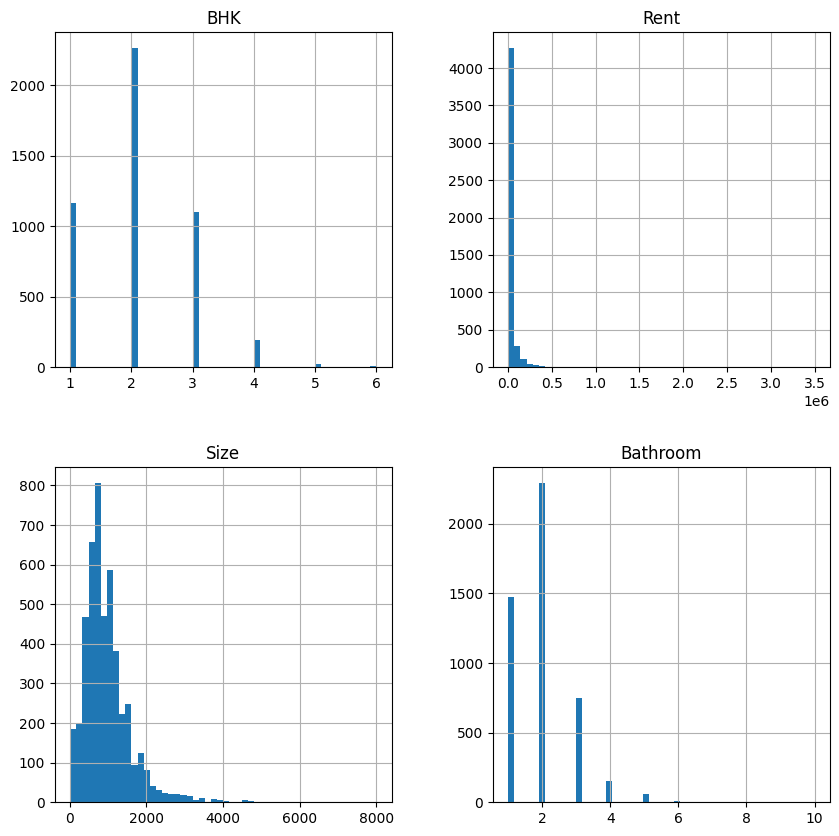

In [67]:
df.hist(bins=50, figsize=(10,10))  # Membuat histogram untuk semua kolom numerik dengan 50 batang dan ukuran 10x10
plt.ticklabel_format(useOffset=False, style='plain')  # Menonaktifkan offset dan menampilkan angka dalam format standar
plt.show()  # Menampilkan plot


In [68]:
df.Rent.describe().apply(lambda x: format(x, 'f'))

,Rent
count,4744.000000
mean,35003.777403
std,78121.204493
min,1200.000000
25%,10000.000000
50%,16000.000000
75%,33000.000000
max,3500000.000000


##**Multivariate Analysis**

In [69]:
# Menambahkan fitur baru price per sqft
df['Price_per_sqft'] = df['Rent']*1000/df['Size']

In [70]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [71]:
# Tampilkan 5 data pertama dengan rasio luas per BHK kurang dari 300 sqft (dianggap tidak wajar)
df[df['Size'] / df['BHK'] < 300].head()


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1,20000.000000
12,1,6500,250,Carpet Area,Kolkata,Furnished,Bachelors,1,26000.000000
21,2,9000,400,Carpet Area,Kolkata,Unfurnished,Bachelors,2,22500.000000
32,2,6000,550,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,10909.090909
33,2,5000,500,Carpet Area,Kolkata,Unfurnished,Bachelors/Family,2,10000.000000


In [72]:
df.shape

(4744, 9)

In [73]:
# Menghapus size per BHK outlier
df1 = df[~(df.Size/df.BHK < 300)]
df1.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [74]:
df1.shape

(4196, 9)

In [75]:
# Mendeteksi price per sqft outlier
df1.Price_per_sqft.describe().apply(lambda x: format(x, 'f'))

,Price_per_sqft
count,4196.000000
mean,32827.385605
std,41300.048982
min,571.428571
25%,13000.000000
50%,18511.595708
75%,34896.788991
max,1400000.000000


In [76]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()  # Buat DataFrame kosong untuk menampung hasil akhir
    for key, subdf in df.groupby('City'):  # Kelompokkan berdasarkan kota
        m = np.mean(subdf.Price_per_sqft)  # Rata-rata price/sqft di kota tersebut
        st = np.std(subdf.Price_per_sqft)  # Standar deviasi price/sqft di kota tersebut
        # Filter data yang berada dalam 1 standar deviasi dari rata-rata
        reduced_df = subdf[(subdf.Price_per_sqft > (m - st)) & (subdf.Price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)  # Gabungkan hasilnya ke df_out
    return df_out

# Terapkan fungsi ke df1 dan tampilkan ukuran hasilnya
df2 = remove_pps_outliers(df1)
df2.shape  # Tampilkan jumlah baris dan kolom setelah outlier dihapus


(3699, 9)

In [77]:
# Mendeteksi bathroom outlier
# 2 BHK dengan 4 kamar mandi itu tidak biasa jadi anggap saja batasnya kamar mandi tidak boleh melebihi jumlah BHK + 2

df2[df2.Bathroom > df2.BHK + 2]


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
860,3,20000,1700,Carpet Area,Chennai,Furnished,Bachelors/Family,6,11764.705882
1904,4,150000,4000,Carpet Area,Delhi,Semi-Furnished,Bachelors,7,37500.000000
3328,1,40000,680,Super Area,Mumbai,Furnished,Bachelors/Family,4,58823.529412


In [78]:
# Hapus data yang memiliki jumlah kamar mandi lebih dari 2 kamar di atas jumlah BHK (misalnya 2 BHK dengan 5+ kamar mandi)
df2 = df2[df2.Bathroom <= df2.BHK + 2]


In [79]:

df2.shape

(3696, 9)

In [80]:
# Menghilangkan fitur price per sqft karena sudah tidak terpakai
df3 = df2.drop(['Price_per_sqft'], axis = 'columns')

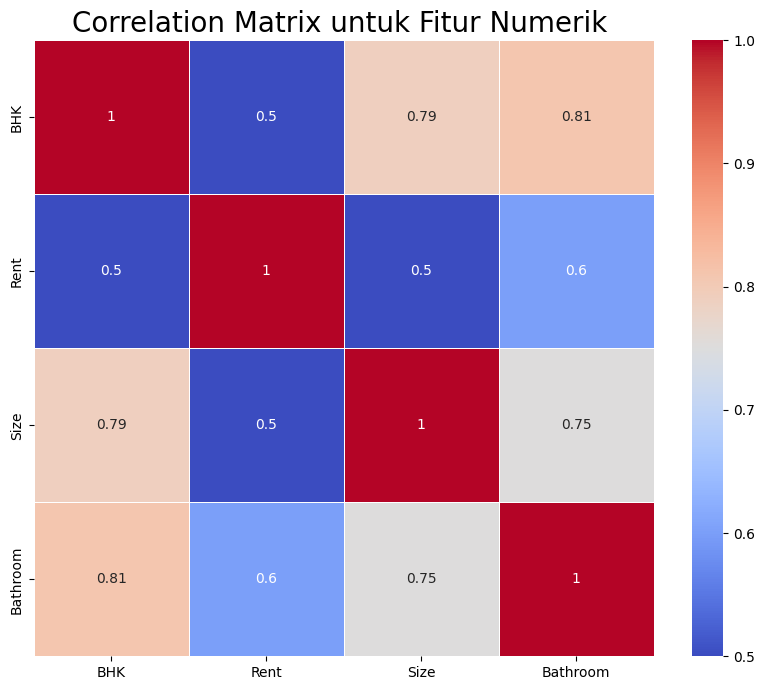

In [81]:
# Melihat kolerasi antara fitur numerik dengan fitur target (harga)
plt.figure(figsize=(10, 8))

# Select only the numeric columns before calculating correlation
correlation_matrix = df3.select_dtypes(include=np.number).corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

<ipython-input-82-a3023a6ed463>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
<ipython-input-82-a3023a6ed463>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
<ipython-input-82-a3023a6ed463>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
<ipython-input-82-a3023a6ed463>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


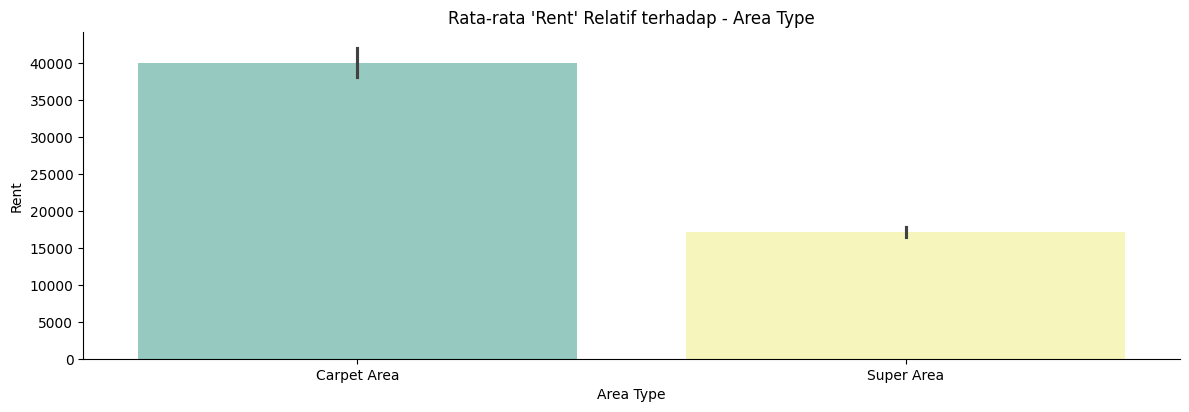

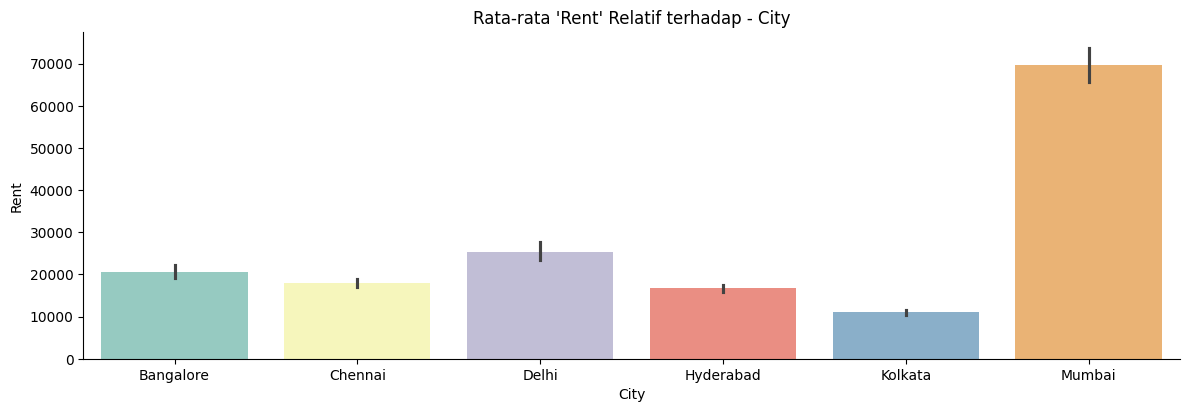

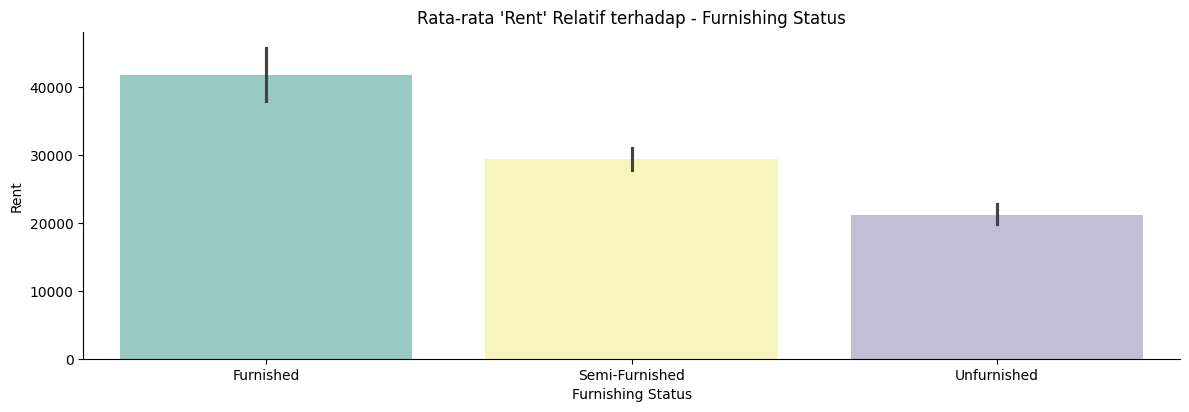

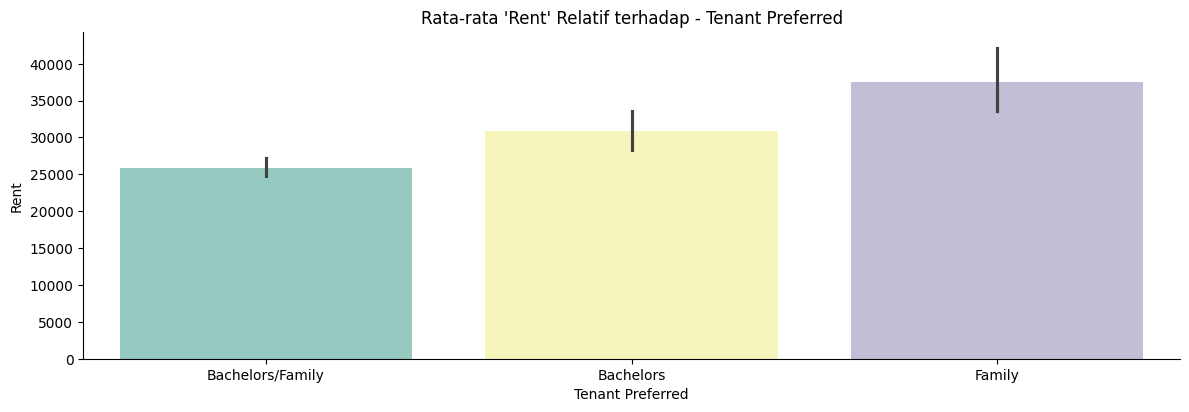

In [82]:
# Ambil daftar kolom yang bertipe kategorik (object)
cat_features = df2.select_dtypes(include='object').columns.to_list()

# Loop untuk setiap fitur kategorik
for col in cat_features:
    # Buat grafik batang rata-rata Rent per kategori fitur tersebut
    sns.catplot(
        x=col, y="Rent", kind="bar", dodge=False,
        height=4, aspect=3,
        data=df2, palette="Set3"
    )
    # Beri judul grafik sesuai dengan fitur yang sedang ditampilkan
    plt.title(f"Rata-rata 'Rent' Relatif terhadap - {col}")


##**Data Preparation**

##One hot enconding

In [83]:

df3 = pd.get_dummies(data =  df3, columns = ['Area Type'])
df3 = pd.get_dummies(data =  df3, columns = ['City'])
df3 = pd.get_dummies(data =  df3, columns = ['Furnishing Status'])
df3 = pd.get_dummies(data =  df3, columns = ['Tenant Preferred'])


In [84]:

df3.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,3,70000,3354,3,True,False,True,False,False,False,False,False,True,False,False,False,True,False
1,2,10500,800,2,False,True,True,False,False,False,False,False,False,True,False,False,True,False
2,2,13000,1000,2,False,True,True,False,False,False,False,False,False,True,False,False,True,False
3,2,17000,1040,2,False,True,True,False,False,False,False,False,True,False,False,False,True,False
4,3,21000,1403,3,False,True,True,False,False,False,False,False,False,True,False,False,True,False


##Train Test Split

In [85]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Install scikit-learn if it's not already installed
!pip install scikit-learn

X = df3.drop(["Rent"], axis=1)       # Menghapus kolom 'Rent' dari df3 untuk dijadikan fitur (X)
y = df3["Rent"]                      # Menyimpan kolom 'Rent' sebagai target (y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=123
)
# Membagi data menjadi 95% data latih dan 5% data uji
# random_state digunakan agar pembagian data selalu konsisten

In [86]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3696
Total # of sample in train dataset: 3511
Total # of sample in test dataset: 185


##Normalization

In [87]:
from sklearn.preprocessing import StandardScaler  # Impor pustaka untuk standardisasi

numerical_features = ['BHK', 'Size', 'Bathroom']  # Daftar fitur numerik yang akan dinormalisasi

scaler = StandardScaler()                         # Membuat objek StandardScaler
scaler.fit(X_train[numerical_features])           # Menghitung rata-rata dan standar deviasi dari data pelatihan

# Menerapkan transformasi ke data pelatihan
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

# Menampilkan hasil normalisasi lima baris pertama
X_train[numerical_features].head()


,BHK,Size,Bathroom
1865,1.186385,0.454836,0.053982
439,-0.071283,-0.376100,0.053982
823,-0.071283,1.470424,0.053982
3463,-0.071283,-0.560752,0.053982
1519,-0.071283,0.194476,0.053982


In [88]:
# Normalisasi data test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-88-cfb4ad00e9c1>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.44405386 -1.32895205  1.18638523 -0.07128341 -0.07128341 -1.32895205
 -0.07128341 -0.07128341  1.18638523 -0.07128341  1.18638523  1.18638523
  1.18638523 -1.32895205 -1.32895205  1.18638523  1.18638523 -0.07128341
 -0.07128341 -1.32895205 -0.07128341 -0.07128341 -0.07128341 -0.07128341
 -0.07128341 -1.32895205 -0.07128341  1.18638523 -1.32895205  2.44405386
  1.18638523 -0.07128341 -0.07128341 -0.07128341 -1.32895205 -1.32895205
 -0.07128341 -0.07128341 -0.07128341 -1.32895205  1.18638523 -1.32895205
 -0.07128341 -1.32895205  1.18638523 -0.07128341 -0.07128341 -1.32895205
 -1.32895205 -0.07128341  2.44405386 -1.32895205 -1.32895205 -1.32895205
 -0.07128341 -0.07128341 -0.07128341 -0.07128341  2.44405386 -0.07128341
  1.18638523 -0.07128341  1.18638523 -0.07128341 -0.07128341 -0.07128341
 -1.32895205 -0.07128341 -1.32895205 -0.0712

##**Modeling**

##Grid Search

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


In [90]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(X,y):
    algos = {
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
            }
        }

    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.05, random_state=123)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

grid_search_model(X,y)

,model,best_score,best_params
0,knn,0.475629,{'n_neighbors': 7}
1,boosting,0.856539,"{'learning_rate': 0.1, 'n_estimators': 100, 'r..."
2,random_forest,0.893655,"{'max_depth': 8, 'n_estimators': 25, 'random_s..."


##Optimized Model

In [91]:
acc = pd.DataFrame(index=['accuracy'])

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
# Membuat model KNN dengan jumlah tetangga sebanyak 7
model_knn = KNeighborsRegressor(n_neighbors=7)

# Melatih model menggunakan data pelatihan
model_knn.fit(X_train, y_train)

# Menyimpan skor akurasi model KNN pada data uji ke dalam DataFrame acc
acc.loc['accuracy', 'knn'] = model_knn.score(X_test, y_test)

# Menampilkan skor akurasi model KNN pada data uji
model_knn.score(X_test, y_test)


0.7269861453056017

In [94]:
rf = RandomForestRegressor(n_estimators = 50, max_depth = 8, random_state = 11)
rf.fit(X_train, y_train)
acc.loc['accuracy', 'rf'] = rf.score(X_test,y_test)
rf.score(X_test,y_test)

0.9320574970694799

In [95]:
# Membuat model AdaBoost Regressor dengan 25 estimator, learning rate 0.001, dan random_state 11
boosting = AdaBoostRegressor(n_estimators=25, learning_rate=0.001, random_state=11)

# Melatih model boosting dengan data pelatihan
boosting.fit(X_train, y_train)

# Menyimpan nilai akurasi model pada data uji ke dalam DataFrame 'acc'
acc.loc['accuracy', 'boosting'] = boosting.score(X_test, y_test)

# Menampilkan skor akurasi model pada data uji
boosting.score(X_test, y_test)


0.8985561811074477

##**Evaluasi**

In [96]:
# Akurasi dari model
acc

,knn,rf,boosting
accuracy,0.726986,0.932057,0.898556


In [97]:
# Membuat DataFrame untuk menyimpan nilai Mean Squared Error (MSE) pada data train dan test untuk tiap model
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

# Membuat dictionary model untuk memudahkan iterasi
# Mengganti 'knn' dengan 'model_knn' yang merupakan nama variabel yang benar
model_dict = {'KNN': model_knn, 'RF': rf, 'Boosting': boosting}

# Menghitung MSE pada data training dan testing untuk setiap model, lalu menyimpannya di DataFrame mse
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)) / 1e3

# Menampilkan tabel MSE
mse

,train,test
KNN,156194.865405,656091.57763
RF,63498.211157,163275.610997
Boosting,171831.281366,243784.09386


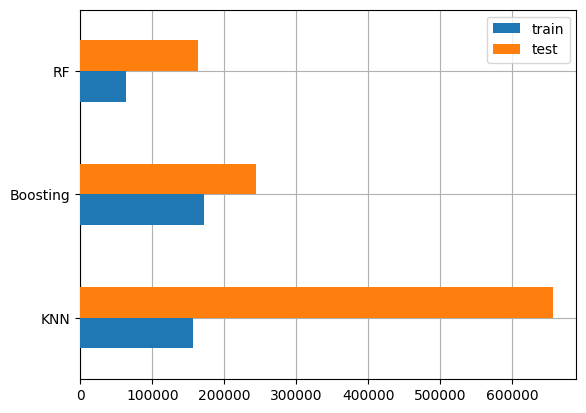

In [98]:

fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [99]:
# Mengambil sampel data X_test dari indeks 5 sampai 9 untuk prediksi
prediksi = X_test.iloc[5:10].copy()

# Membuat dictionary untuk menyimpan nilai aktual dari y_test
pred_dict = {'y_true': y_test[5:10]}

# Melakukan prediksi pada data sampel dengan setiap model dan menyimpan hasilnya dalam dictionary
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

# Mengubah dictionary hasil prediksi dan nilai sebenarnya menjadi DataFrame untuk memudahkan perbandingan
pd.DataFrame(pred_dict)


,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1733,11000,11071.4,10913.1,13168.5
1442,13000,12071.4,13297.7,13168.5
1911,18000,21571.4,22240.4,13517.4
2003,22000,21285.7,17893.1,18242.7
553,11000,16214.3,11114.7,13168.5
